In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import glob
import cv2

from keras.models import Model, Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
import os
import seaborn as sns


In [2]:
from keras.models import Sequential  
from keras.layers import Dense,Flatten,Dropout  
from keras.layers.convolutional import Conv2D,MaxPooling2D  
from keras.utils.np_utils import to_categorical  
import numpy as np  

In [3]:
seed = 7  
np.random.seed(seed)

In [4]:
print(os.listdir("images/"))

SIZE = 224  #Resize images

#Capture training data and labels into respective lists
train_images = []
train_labels = [] 

for directory_path in glob.glob("images/train/*"):
    label = directory_path.split("\\")[-1]
    print(label)
    for img_path in glob.glob(os.path.join(directory_path, "*.jpg")):
        print(img_path)
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)       
        img = cv2.resize(img, (SIZE, SIZE))
        img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        train_images.append(img)
        train_labels.append(label)
        
        #Convert lists to arrays        
train_images = np.array(train_images)
train_labels = np.array(train_labels)


# Capture test/validation data and labels into respective lists

test_images = []
test_labels = [] 
for directory_path in glob.glob("images/test/*"):
    fruit_label = directory_path.split("\\")[-1]
    print(fruit_label)
    for img_path in glob.glob(os.path.join(directory_path, "*.jpg")):
        print(img_path)
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)
        img = cv2.resize(img, (SIZE, SIZE))
        img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        test_images.append(img)
        test_labels.append(fruit_label)
        
        #Convert lists to arrays                
test_images = np.array(test_images)
test_labels = np.array(test_labels)

#Encode labels from text to integers.
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(test_labels)
test_labels_encoded = le.transform(test_labels)
le.fit(train_labels)
train_labels_encoded = le.transform(train_labels)
#it make the data calass name to numerical formate like 1,2,3,4 for calculation purpose

#Split data into test and train datasets (already split but assigning to meaningful convention)
x_train, y_train, x_test, y_test = train_images, train_labels_encoded, test_images, test_labels_encoded

# Normalize pixel values to between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

#One hot encode y values for neural network. make tahe numamic class in a matrix
from keras.utils.np_utils import to_categorical
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

['Test', 'Train']
Bacterial leaf blight
images/train\Bacterial leaf blight\DSC_0366.jpg
images/train\Bacterial leaf blight\DSC_0367.JPG
images/train\Bacterial leaf blight\DSC_0370.jpg
images/train\Bacterial leaf blight\DSC_0372.JPG
images/train\Bacterial leaf blight\DSC_0373.JPG
images/train\Bacterial leaf blight\DSC_0375.JPG
images/train\Bacterial leaf blight\DSC_0376.JPG
images/train\Bacterial leaf blight\DSC_0377.JPG
images/train\Bacterial leaf blight\DSC_0378.JPG
images/train\Bacterial leaf blight\DSC_0380.JPG
images/train\Bacterial leaf blight\DSC_0381.JPG
images/train\Bacterial leaf blight\DSC_0382.JPG
images/train\Bacterial leaf blight\DSC_0384.JPG
images/train\Bacterial leaf blight\DSC_0386.JPG
images/train\Bacterial leaf blight\DSC_0388.JPG
images/train\Bacterial leaf blight\DSC_0389.JPG
images/train\Bacterial leaf blight\DSC_0390.JPG
images/train\Bacterial leaf blight\DSC_0393.JPG
images/train\Bacterial leaf blight\DSC_0396.JPG
images/train\Bacterial leaf blight\DSC_0397.JPG


In [5]:
###########################################################################################################
model = Sequential()  
model.add(Conv2D(96,(11,11),strides=(4,4),input_shape=(224,224,3),padding='valid',activation='relu',kernel_initializer='uniform'))  
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))  
model.add(Conv2D(256,(5,5),strides=(1,1),padding='same',activation='relu',kernel_initializer='uniform'))  
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))  
model.add(Conv2D(384,(3,3),strides=(1,1),padding='same',activation='relu',kernel_initializer='uniform'))  
model.add(Conv2D(384,(3,3),strides=(1,1),padding='same',activation='relu',kernel_initializer='uniform'))  
model.add(Conv2D(256,(3,3),strides=(1,1),padding='same',activation='relu',kernel_initializer='uniform'))  
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))  
model.add(Flatten())  
model.add(Dense(4096,activation='relu'))  
model.add(Dropout(0.5))  
model.add(Dense(4096,activation='relu'))  
model.add(Dropout(0.5))  
model.add(Dense(1000,activation='softmax'))  
model.compile(loss='categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])  
model.summary() 
############################################################################################################

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 54, 54, 96)        34944     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 26, 26, 96)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 26, 26, 256)       614656    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 256)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 384)       885120    
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 384)       1327488   
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 12, 12, 256)       8

In [6]:
#Make loaded layers as non-trainable. This is important as we want to work with pre-trained weights .. 
#no data will be trainable (we are not gone train this with multiple epocs  )

for layer in model.layers:
	layer.trainable = False
    
model.summary()  #Trainable parameters will be 0

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 54, 54, 96)        34944     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 26, 26, 96)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 26, 26, 256)       614656    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 256)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 384)       885120    
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 384)       1327488   
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 12, 12, 256)       8

In [7]:
VGG_model = model

In [8]:
#Now, let us use features from convolutional network for RF( we send oure input deta throw this feature extracture)
feature_extractor=VGG_model.predict(x_train)

In [9]:
VGG_model.save('model.h5')

In [10]:

features = feature_extractor.reshape(feature_extractor.shape[0], -1) #reshape is for random forest it will be 2d arry

X_for_RF = features #This is our X input to RF (random forest)

In [11]:
#############################################################################################################################################
#RANDOM FOREST (it is classifiare problem not a regrassion problem nost use random forest regrassion) # n_estimators 50 mens it will generate 50 tree
# you can use another classifire module there like decition tree svm etc
from sklearn.ensemble import RandomForestClassifier 
RF_model = RandomForestClassifier(n_estimators = 50, random_state = 42)
###############################################################################################################################################

In [12]:
# Train the model on training data
#For sklearn no one hot encoding x_for_rf random forest y_train (are level value)
RF_model.fit(X_for_RF, y_train) 

#Send test data through same feature extractor process
# there vgg model is nothing only featere extractor 
#then reshape it 
#work like train data 
X_test_feature = VGG_model.predict(x_test)
X_test_features = X_test_feature.reshape(X_test_feature.shape[0], -1)

#Now predict using the trained RF model. 
prediction_RF = RF_model.predict(X_test_features) # out put will look like 1.2.3



In [13]:
prediction_RF.shape

(24,)

In [36]:
X_test_feature.shape

(24, 1000)

In [14]:
#Inverse le transform to get original label back. 
prediction_RF = le.inverse_transform(prediction_RF) #before we make the class value like 1,2,3 numeric its re build this

In [15]:
prediction_RF.shape

(24,)

In [16]:
import joblib



# save
joblib.dump(RF_model, "my_random_forest.joblib")

['my_random_forest.joblib']

In [17]:
#Print overall accuracy
from sklearn import metrics
print ("Accuracy = ", metrics.accuracy_score(test_labels, prediction_RF)) #provide test and prediction data to measure that

Accuracy =  0.875


<AxesSubplot:>

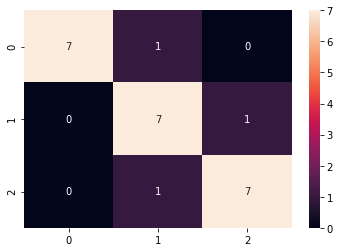

In [18]:
#Confusion Matrix - verify accuracy of each class
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_labels, prediction_RF)
#print(cm)
sns.heatmap(cm, annot=True)

0
The actual label for this image is:  Bacterial leaf blight
The prediction for this image is:  ['Bacterial leaf blight']


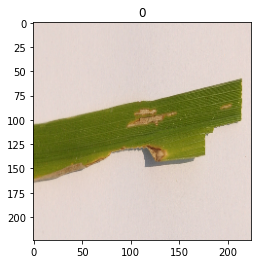

1
The actual label for this image is:  Bacterial leaf blight
The prediction for this image is:  ['Brown spot']


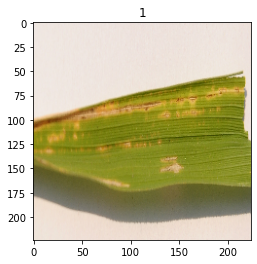

2
The actual label for this image is:  Bacterial leaf blight
The prediction for this image is:  ['Bacterial leaf blight']


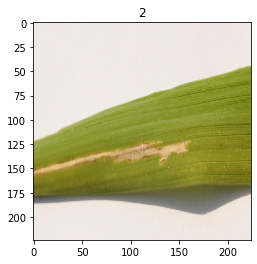

3
The actual label for this image is:  Bacterial leaf blight
The prediction for this image is:  ['Bacterial leaf blight']


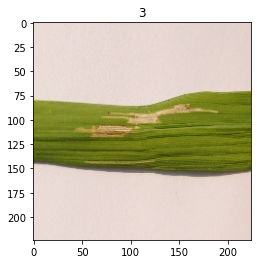

4
The actual label for this image is:  Bacterial leaf blight
The prediction for this image is:  ['Bacterial leaf blight']


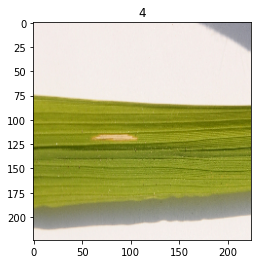

5
The actual label for this image is:  Bacterial leaf blight
The prediction for this image is:  ['Bacterial leaf blight']


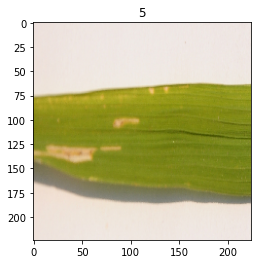

6
The actual label for this image is:  Bacterial leaf blight
The prediction for this image is:  ['Bacterial leaf blight']


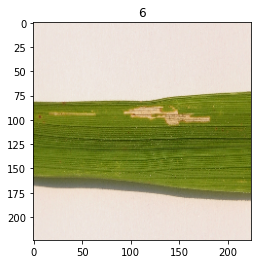

7
The actual label for this image is:  Bacterial leaf blight
The prediction for this image is:  ['Bacterial leaf blight']


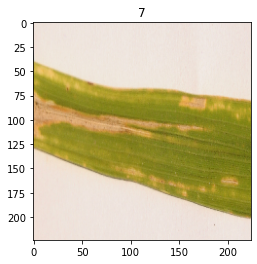

8
The actual label for this image is:  Brown spot
The prediction for this image is:  ['Brown spot']


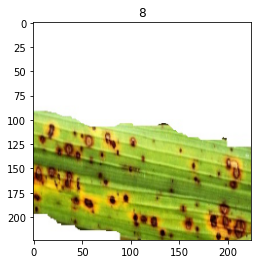

9
The actual label for this image is:  Brown spot
The prediction for this image is:  ['Brown spot']


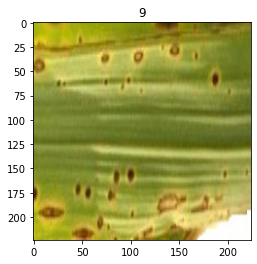

10
The actual label for this image is:  Brown spot
The prediction for this image is:  ['Leaf smut']


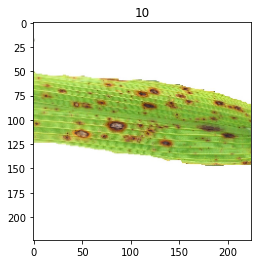

11
The actual label for this image is:  Brown spot
The prediction for this image is:  ['Brown spot']


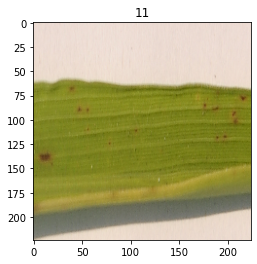

12
The actual label for this image is:  Brown spot
The prediction for this image is:  ['Brown spot']


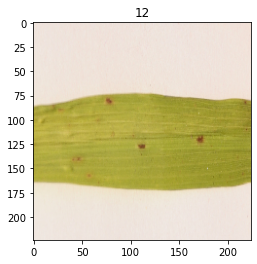

13
The actual label for this image is:  Brown spot
The prediction for this image is:  ['Brown spot']


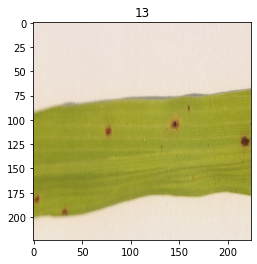

14
The actual label for this image is:  Brown spot
The prediction for this image is:  ['Brown spot']


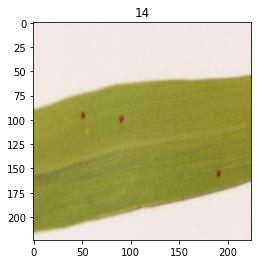

In [19]:
#Check results on a few select images according the test data.

from colorama import Fore, Back, Style


for n in range(15):

    img = x_test[n]
    fig=plt.figure()
    plt.title(n)
    plt.imshow(img)
    
    
     
    print (n)
    
    input_img = np.expand_dims(img, axis=0) #Expand dims so the input is (num images, x, y, c)
    input_img_feature=VGG_model.predict(input_img)
    input_img_features=input_img_feature.reshape(input_img_feature.shape[0], -1)
    prediction_RF = RF_model.predict(input_img_features)[0] 
    prediction_RF = le.inverse_transform([prediction_RF])  #Reverse the label encoder to original name
    print(Fore.GREEN + "The actual label for this image is: ", test_labels[n])

    if (prediction_RF == test_labels[n]):
        print(Fore.GREEN + "The prediction for this image is: ", prediction_RF)
    else:
        print(Fore.RED + "The prediction for this image is: ", prediction_RF)
    plt.show()

In [20]:
import tensorflow as tf
loaded_model1 = tf.keras.models.load_model('model.h5')

In [21]:
X_test_features =loaded_model1.predict(x_test)
X_test_features = X_test_feature.reshape(X_test_feature.shape[0], -1)

In [22]:
# load
loaded_rf = joblib.load("my_random_forest.joblib")

In [23]:
#Now predict using the trained RF model. 
prediction_RF = loaded_rf.predict(X_test_features) # out put will look like 1.2.3

#Inverse le transform to get original label back. 
prediction_RF = le.inverse_transform(prediction_RF) #before we make the class value like 1,2,3 numeric its re build this

In [24]:
#Print overall accuracy
from sklearn import metrics
print ("Accuracy = ", metrics.accuracy_score(test_labels, prediction_RF)) #provide test and prediction data to measure that

Accuracy =  0.875


2
The actual label for this image is:  Brown spot


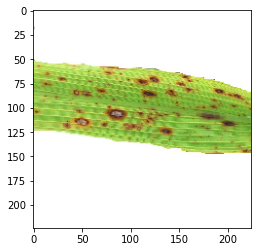

In [25]:
#Check results on a few select images according the test data.
from colorama import Fore, Back, Style

n=10
img = x_test[n]
img
plt.imshow(img)
input_img = np.expand_dims(img, axis=0) #Expand dims so the input is (num images, x, y, c)
input_img_feature=VGG_model.predict(input_img)
input_img_features=input_img_feature.reshape(input_img_feature.shape[0], -1)
prediction_RF = RF_model.predict(input_img_features)[0] 
print(prediction_RF)
prediction_RF.shape
prediction_RF = le.inverse_transform([prediction_RF])  #Reverse the label encoder to original name
print(Fore.GREEN + "The actual label for this image is: ", test_labels[n])

if (prediction_RF == test_labels[n]):
    print(Fore.GREEN + "The prediction for this image is: ", prediction_RF)


In [26]:
from keras.preprocessing import image

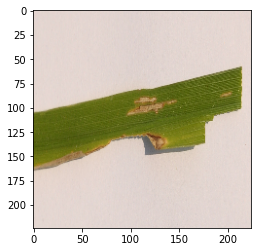

In [27]:
img_path = 'images/Test/Bacterial leaf blight/DSC_0365.JPG'
img = image.load_img(img_path, target_size=(224, 224))
plt.imshow(img)

1
The actual label for this image is:  Brown spot
The prediction for this image is:  ['Brown spot']


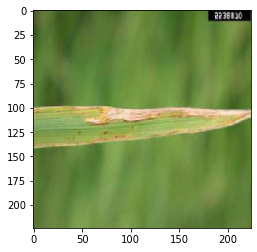

In [28]:
#Check results on a few select images according the test data.
from colorama import Fore, Back, Style


img_path = 'BACTERAILBLIGHT3_023.jpg'
img = image.load_img(img_path, target_size=(224, 224))
plt.imshow(img)
input_img = np.expand_dims(img, axis=0) #Expand dims so the input is (num images, x, y, c)
input_img_feature=VGG_model.predict(input_img)
input_img_features=input_img_feature.reshape(input_img_feature.shape[0], -1)
prediction_RF = RF_model.predict(input_img_features)[0] 
print(prediction_RF)
prediction_RF.shape
prediction_RF = le.inverse_transform([prediction_RF])  #Reverse the label encoder to original name
print(Fore.GREEN + "The actual label for this image is: ", test_labels[n])

if (prediction_RF == test_labels[n]):
    print(Fore.GREEN + "The prediction for this image is: ", prediction_RF)


1
The actual label for this image is:  Brown spot


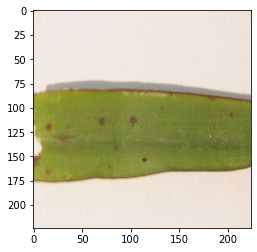

In [29]:
#Check results on a few select images according the test data.
from colorama import Fore, Back, Style


img_path = 'images/Test/Leaf smut/DSC_0316.JPG'
img = image.load_img(img_path, target_size=(224, 224))
plt.imshow(img)

input_img_feature=VGG_model.predict(input_img)
input_img_features=input_img_feature.reshape(input_img_feature.shape[0], -1)
prediction_RF = RF_model.predict(input_img_features)[0] 
print(prediction_RF)
prediction_RF.shape
prediction_RF = le.inverse_transform([prediction_RF])  #Reverse the label encoder to original name
print("The actual label for this image is: ", test_labels[n])



In [30]:
def load_label_names():
    return ['leaf_Blight', 'Blast', 'Brownspot']

In [31]:
from sklearn.preprocessing import LabelBinarizer

def display_image_predictions(features, labels, predictions):
    n_classes = 10
    label_names = load_label_names()
    label_binarizer = LabelBinarizer()
    label_binarizer.fit(range(n_classes))
    label_ids = label_binarizer.inverse_transform(np.array(labels))

    fig, axs = plt.subplots(10, 2, figsize=(12,24))

    margin = 0.05
    ind = np.arange(n_classes)
    width = (1. - 2. * margin) / n_classes    
    
    for image_i, (feature, label_id, prediction) in enumerate(zip(features, label_ids, predictions)):
        correct_name = label_names[label_id]
        pred_name = label_names[np.argmax(prediction)]
        
        is_match = 'False'        
        
        if np.argmax(prediction) == label_id:
            is_match = 'True'
            
        predictions_array = []
        pred_names = []
        
        for index, pred_value in enumerate(prediction):
            tmp_pred_name = label_names[index]
            predictions_array.append({tmp_pred_name : pred_value})
            pred_names.append(tmp_pred_name)
        
        print('[{}] ground truth: {}, predicted result: {} | {}'.format(image_i, correct_name, pred_name, is_match))
        print('\t- {}\n'.format(predictions_array))
        
        axs[image_i][0].imshow(feature)
        axs[image_i][0].set_title(pred_name)
        axs[image_i][0].set_axis_off()
        
        axs[image_i][1].barh(ind + margin, prediction, width)
        axs[image_i][1].set_yticks(ind + margin)
        axs[image_i][1].set_yticklabels(pred_names)
        
    plt.tight_layout()

In [32]:
import pickle

In [33]:
x_train.shape

(96, 224, 224, 3)

In [34]:
y_train.shape

(96,)

In [35]:
import skimage
import numpy as np

test_features, test_labels = pickle.load(open('preprocess_testing.p', mode='rb'))
tmpFeatures = []

for feature in test_features:
    tmpFeature = skimage.transform.resize(feature, (224, 224), mode='constant')
    tmpFeatures.append(tmpFeature)

tmpFeatures = np.asarray(tmpFeatures)

FileNotFoundError: [Errno 2] No such file or directory: 'preprocess_testing.p'

In [ ]:
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import random
import tensorflow as tf

save_model_path = './image_classification'
batch_size = 64
n_samples = 10
top_n_predictions = 5

def test_model(tmpFeatures):
    loaded_graph = tf.Graph()
    
    with tf.Session(graph=loaded_graph) as sess:
        loader = tf.train.import_meta_graph(save_model_path + '.meta')
        loader.restore(sess, save_model_path)
        
        # Get accuracy in batches for memory limitations
        test_batch_acc_total = 0
        test_batch_count = 0
        
        loaded_x = loaded_graph.get_tensor_by_name('input:0')
        loaded_y = loaded_graph.get_tensor_by_name('label:0')
        loaded_logits = loaded_graph.get_tensor_by_name('logits:0')
        loaded_acc = loaded_graph.get_tensor_by_name('accuracy:0')
        
        for train_feature_batch, train_label_batch in cifar10_utils.batch_features_labels(tmpFeatures, test_labels, batch_size):
            test_batch_acc_total += sess.run(
                loaded_acc,
                feed_dict={loaded_x: train_feature_batch, loaded_y: train_label_batch})
            test_batch_count += 1

        print('Testing Accuracy: {}\n'.format(test_batch_acc_total/test_batch_count))

        # Print Random Samples
        random_test_features, random_test_labels = tuple(zip(*random.sample(list(zip(test_features, test_labels)), n_samples)))
        
        tmpTestFeatures = []
    
        for feature in random_test_features:
            tmpFeature = skimage.transform.resize(feature, (224, 224), mode='constant')
            tmpTestFeatures.append(tmpFeature)
           
        random_test_predictions = sess.run(
            tf.nn.softmax(loaded_logits),
            feed_dict={loaded_x: tmpTestFeatures, loaded_y: random_test_labels})
        
        display_image_predictions(random_test_features, random_test_labels, random_test_predictions)

test_model(tmpFeatures)